In [39]:
import pandas as pd
from itertools import chain
from collections import Counter
import os
from utils import load_json_config

In [40]:
config = load_json_config("config.json")

## Downloading a small or a large dataset

### SMALL (~2k records)

In [ ]:
!gdown {config["small_dataset_csv"]}

### LARGE (~26k records)

In [41]:
!gdown {config["big_dataset_csv"]}

Downloading...
From: https://drive.google.com/uc?id=1PvTRrZcucqBK3b-5C-tBg1CmXw5PjVQ-
To: /home/yehor/Desktop/Genre_based_on_album_cover/big_dataset.csv
100%|██████████████████████████████████████| 3.12M/3.12M [00:00<00:00, 10.8MB/s]


## Downloading a small or large set of imgs associated with the dataset

### SMALL (~180mb)

In [ ]:
!gdown {config["small_dataset_imgs"]}

### LARGE (~1.5gb)

In [5]:
!gdown {config["large_dataset_imgs"]}

Downloading...
From (original): https://drive.google.com/uc?id=1SclqlPrDQQ3tYZcAC4LR6tLRiii7qZJF
From (redirected): https://drive.google.com/uc?id=1SclqlPrDQQ3tYZcAC4LR6tLRiii7qZJF&confirm=t&uuid=a887ac3e-09ea-4ec3-9697-0fe12570af56
To: /home/yehor/Desktop/Genre_based_on_album_cover/large_dataset_imgs.zip
100%|██████████████████████████████████████| 1.61G/1.61G [02:19<00:00, 11.6MB/s]


NOTE: YOU HAVE TO ALTER THE PATH BELOW BASED ON WHEREVER YOU DOWNLOADED THE DATA

In [6]:
!unzip -o /home/yehor/Desktop/Genre_based_on_album_cover/large_dataset_imgs.zip > /dev/null

NOTE: YOU HAVE TO ALTER THE PATH BELOW BASED ON WHEREVER YOU DOWNLOADED THE DATA

In [23]:
images_location = "/home/yehor/Desktop/Genre_based_on_album_cover/large_cleaned_dataset_imgs"

## Organizing the data

In [57]:
df = pd.read_csv("/home/yehor/Desktop/Genre_based_on_album_cover/big_dataset.csv")
df

Unnamed: 0  album_index                album_id  \
0               0            0  5n1GSzC1Reao29ScnpLYqp   
1               1            1  6UYZEYjpN1DYRW0kqFy9ZE   
2               2            2  7uVimUILdzSZG4KKKWToq0   
3               3            3  35s58BRTGAEWztPo9WqCIs   
4               4            4  41GuZcammIkupMPKH2OJ6I   
...           ...          ...                     ...   
26514       26514        26514  6AKvqcMFVMS7qz1QCOYvdd   
26515       26515        26515  0Gt9RgFYh2jMvv5ix5lCA1   
26516       26516        26516  5Cw32z9ICOrrbS8Q5JcpDv   
26517       26517        26517  0B9f1PqUNLUEkNHxJPrtbR   
26518       26518        26518  6wf7Rh10EoTaqZMdN2xRlI   

                                                  genres  
0      [['florida rap', 'hip hop', 'miami hip hop', '...  
1      [['hip hop', 'philly rap', 'pop', 'pop rap', '...  
2      [['adult standards', 'canadian pop', 'lounge',...  
3                                                   [[]]  
4                            [['pop', 'pop rap', 'rap']]  
...                                                  ...  
26514                                                 []  
26515  [['beach music', 'brill building pop', 'chicag...  
26516                                                 []  
26517                                                 []  
26518                                                 []  

[26519 rows x 4 columns]

Deleting the images whose records are not present in the .csv file (if any)

In [58]:
df = df[df['album_index'].apply(lambda x: os.path.exists(f"{images_location}/{x}.jpg"))]

In [59]:
df

Unnamed: 0  album_index                album_id  \
0               0            0  5n1GSzC1Reao29ScnpLYqp   
1               1            1  6UYZEYjpN1DYRW0kqFy9ZE   
2               2            2  7uVimUILdzSZG4KKKWToq0   
3               3            3  35s58BRTGAEWztPo9WqCIs   
4               4            4  41GuZcammIkupMPKH2OJ6I   
...           ...          ...                     ...   
26509       26509        26509  5lXF6AFeXG8UsIUfBJNsNH   
26510       26510        26510  4ceeeNqKJ9OtF33DaHQuum   
26511       26511        26511  1G8AfOjrE0FO9w1gfemIy1   
26512       26512        26512  62usLEsQho4s5TCfa6Ks4s   
26515       26515        26515  0Gt9RgFYh2jMvv5ix5lCA1   

                                                  genres  
0      [['florida rap', 'hip hop', 'miami hip hop', '...  
1      [['hip hop', 'philly rap', 'pop', 'pop rap', '...  
2      [['adult standards', 'canadian pop', 'lounge',...  
3                                                   [[]]  
4                            [['pop', 'pop rap', 'rap']]  
...                                                  ...  
26509  [['adult standards', 'easy listening', 'lounge...  
26510  [['adult standards', 'bebop', 'bossa nova', 'c...  
26511  [['baroque pop', 'brill building pop', 'folk r...  
26512  [['adult standards', 'bebop', 'big band', 'coo...  
26515  [['beach music', 'brill building pop', 'chicag...  

[26177 rows x 4 columns]

Now proceeding to merging the branches of genres into the parent genres

In [60]:
maps = load_json_config("category_keywords.json")

In [61]:
indexed_categories = maps["indexed_categories"]
keyword_to_category = maps["keyword_to_category"]

In [62]:
def extract_genres(genres):
    return list(chain.from_iterable(eval(genres)))

In [63]:
def parent_genre(sub_genre):
    if not sub_genre or not isinstance(sub_genre, str):
        return "unknown"
    
    sub_genre = sub_genre.lower()
    for keyword, category in keyword_to_category.items():
        if keyword in sub_genre:
            return category
    
    return "unknown"

In [64]:
def assign_genre(sub_genres):
    genre_counts = Counter([parent_genre(sub_genre) for sub_genre in sub_genres])
    if len(genre_counts) == 0:
        return "unknown"
    return max(genre_counts.items(), key=lambda item: item[1])[0]  # return the genre with max count

In [65]:
cleaned_df = pd.DataFrame({"album_id": pd.Series(dtype="int"), "genre": pd.Series(dtype="int")})
for row in df.itertuples(index=True, name="Row"):
    genre = assign_genre(extract_genres(row.genres))
    if genre == "unknown":
        continue
    new_row = pd.DataFrame([{"album_id": int(row.album_index), "genre": indexed_categories[genre]}])
    cleaned_df = pd.concat([cleaned_df, new_row], ignore_index=True)

cleaned_df

album_id  genre
0             0      0
1             1      0
2             4      0
3             6      3
4             7      0
...         ...    ...
12773     26508      3
12774     26509      1
12775     26510      1
12776     26511      3
12777     26512      1

[12778 rows x 2 columns]

In [66]:
cleaned_df["genre"].value_counts()

genre
3    7310
0    2143
2    1848
1    1477
Name: count, dtype: int64

In [67]:
cleaned_df.to_csv(config["organized_dataset_name"], index=False)

## Balancing the cleaned dataset (OPTIONAL)

In [68]:
# count occurrences of each genre
genre_counts = cleaned_df['genre'].value_counts()

# find the count of the least represented genre
min_count = genre_counts.min()

# sample each genre to match the least represented genre's count
balanced_df = pd.concat(
    [cleaned_df[cleaned_df['genre'] == genre].sample(n=min_count, random_state=43) for genre in genre_counts.index]
)

# shuffle the balanced DataFrame
balanced_df = balanced_df.sample(frac=1, random_state=43).reset_index(drop=True)

In [69]:
balanced_df["genre"].value_counts()

genre
1    1477
0    1477
3    1477
2    1477
Name: count, dtype: int64

Save the balanced dataset as a .csv file:

In [70]:
balanced_df.to_csv(config["organized_balanced_dataset_name"], index=False)

## Checking for potential mislabeling (OPTIONAL)

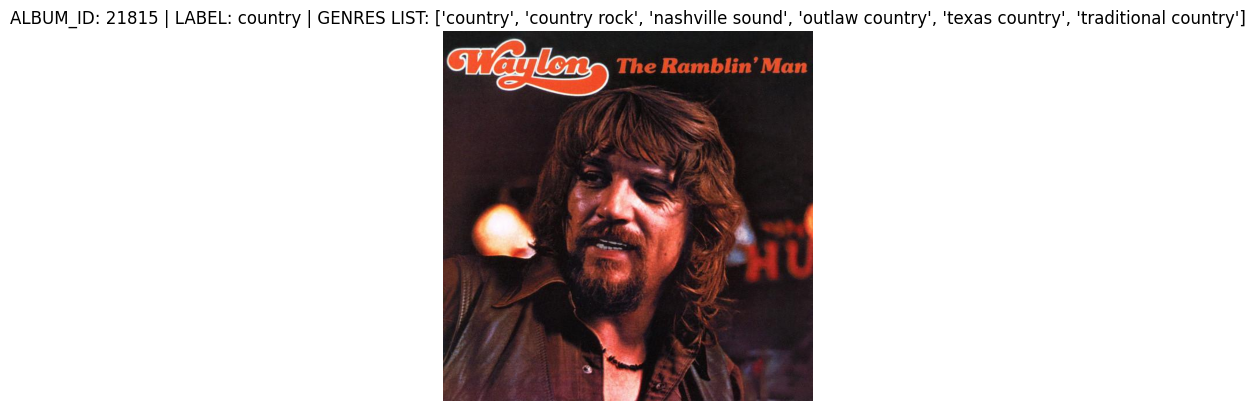

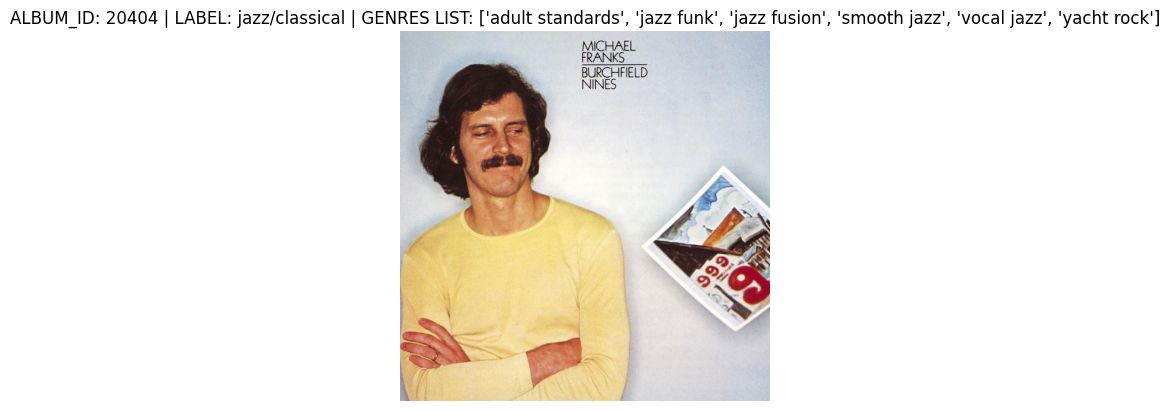

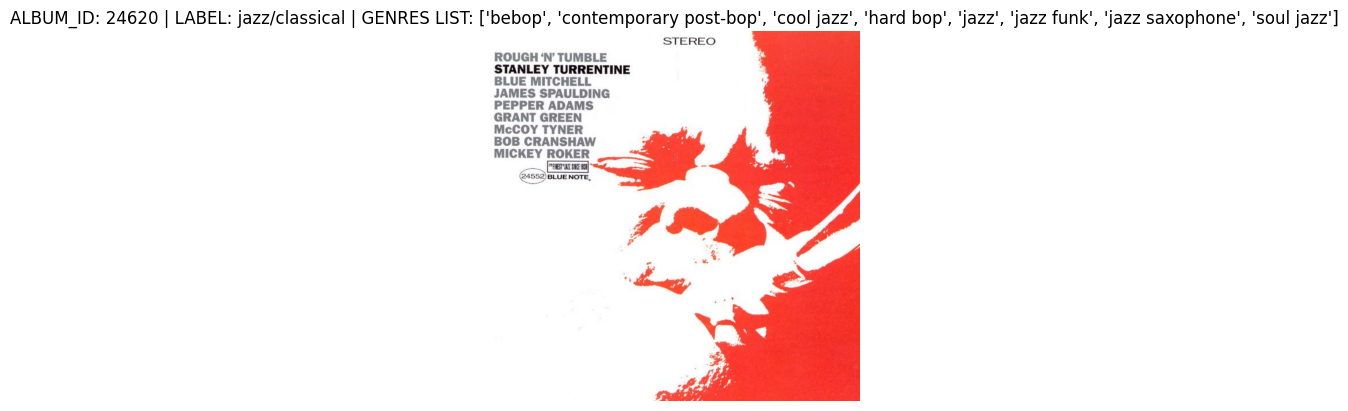

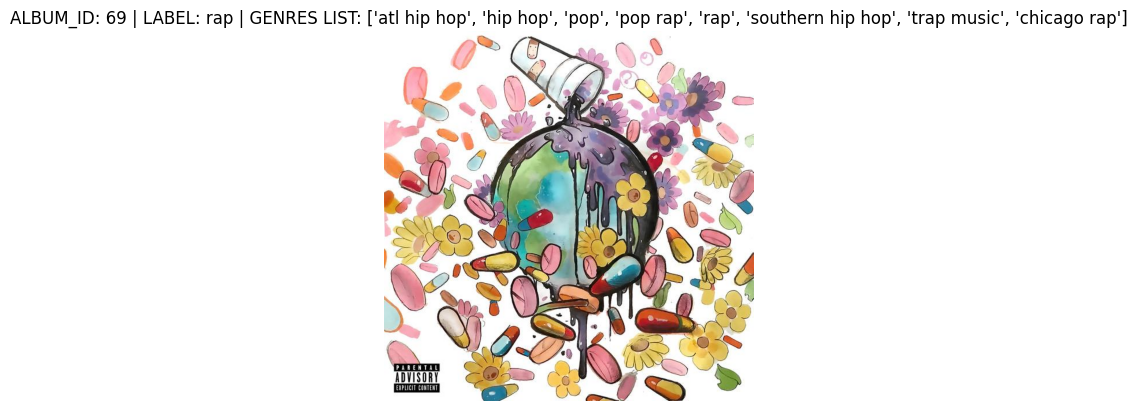

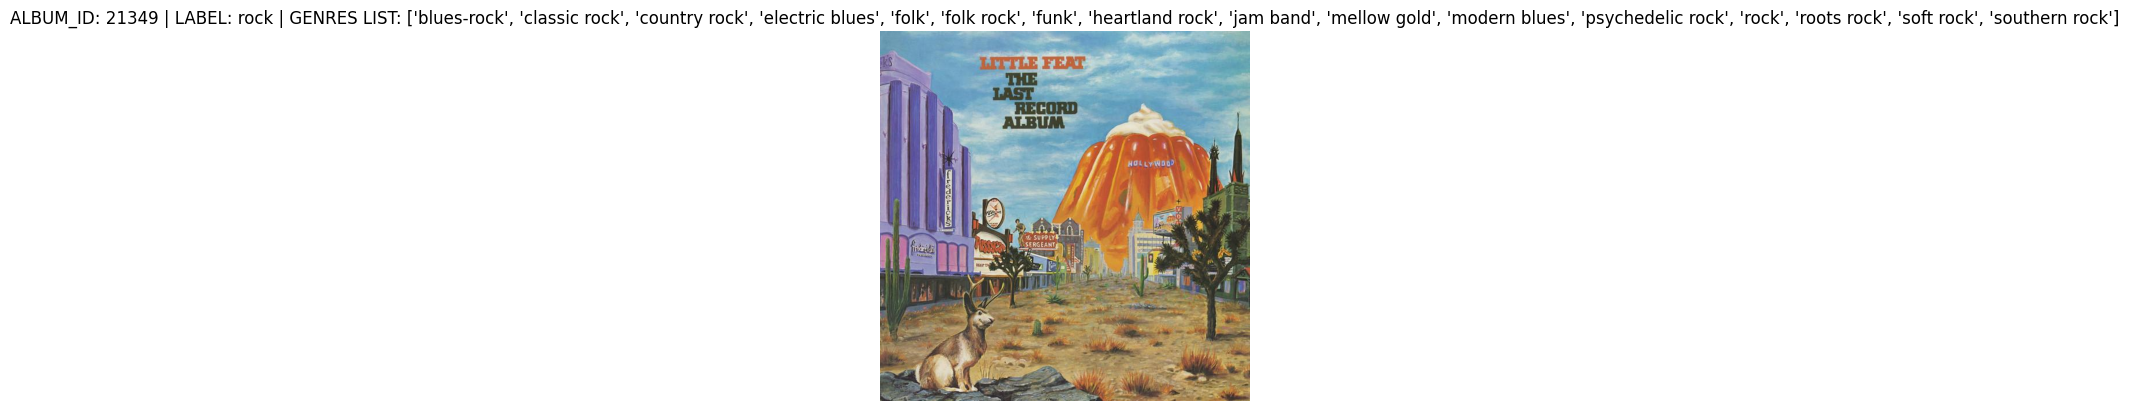

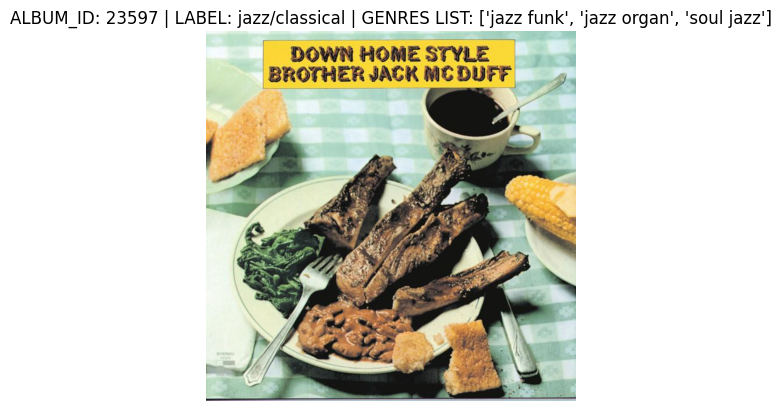

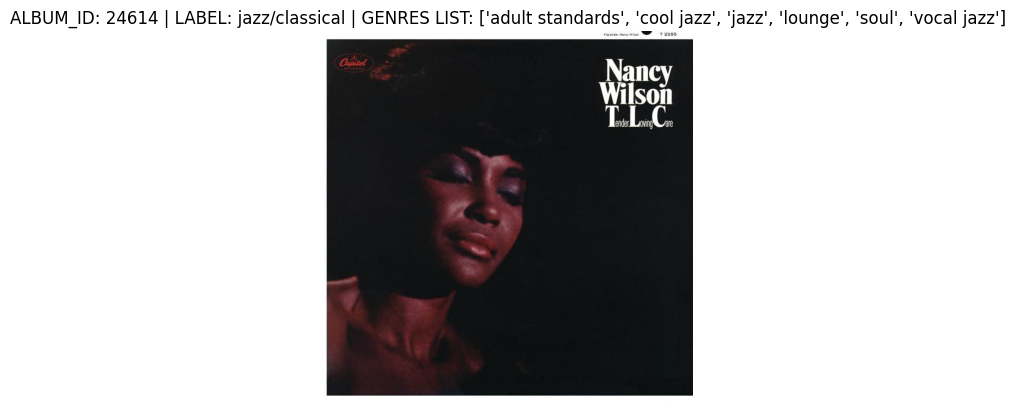

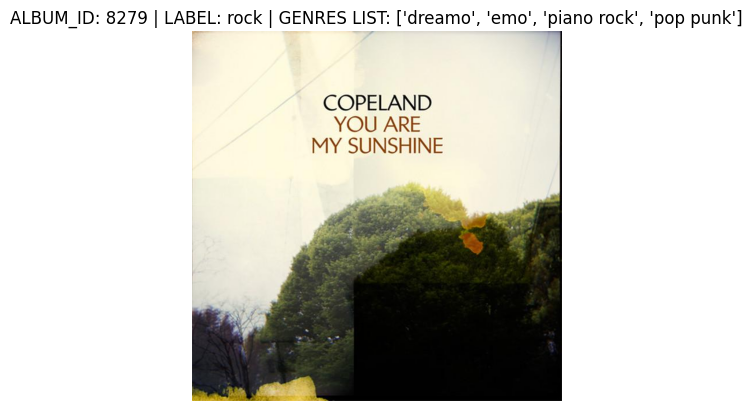

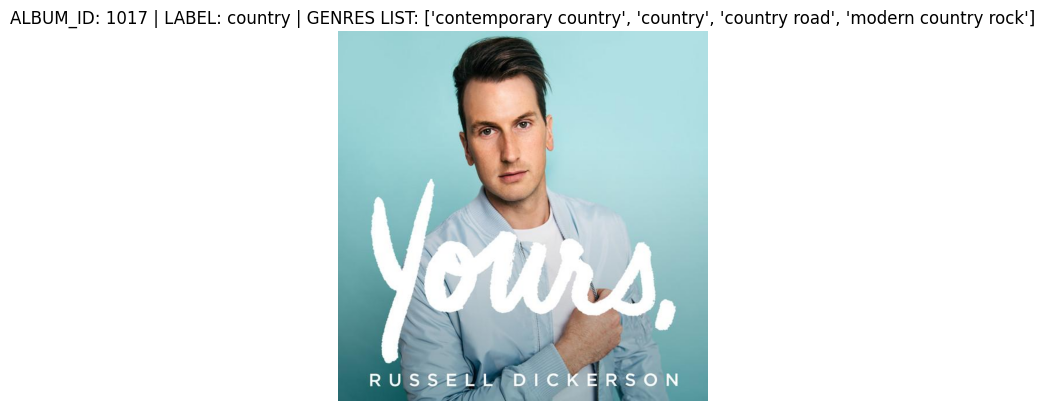

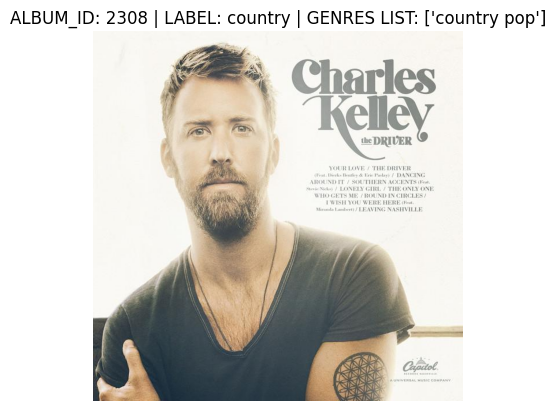

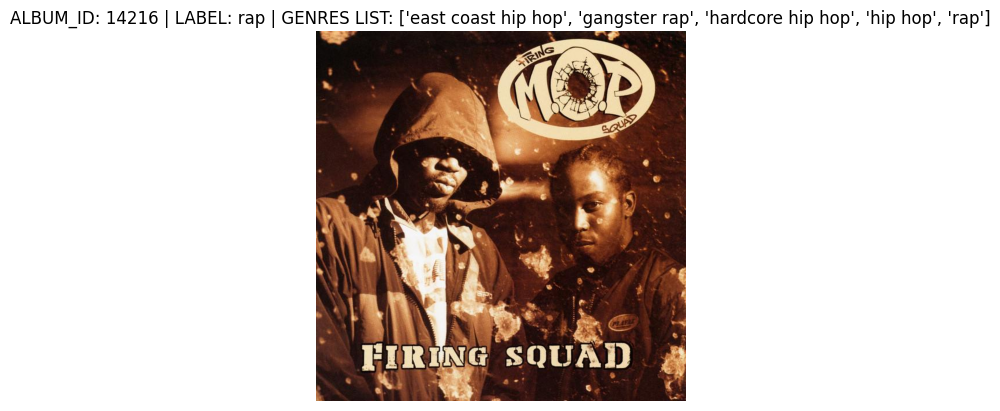

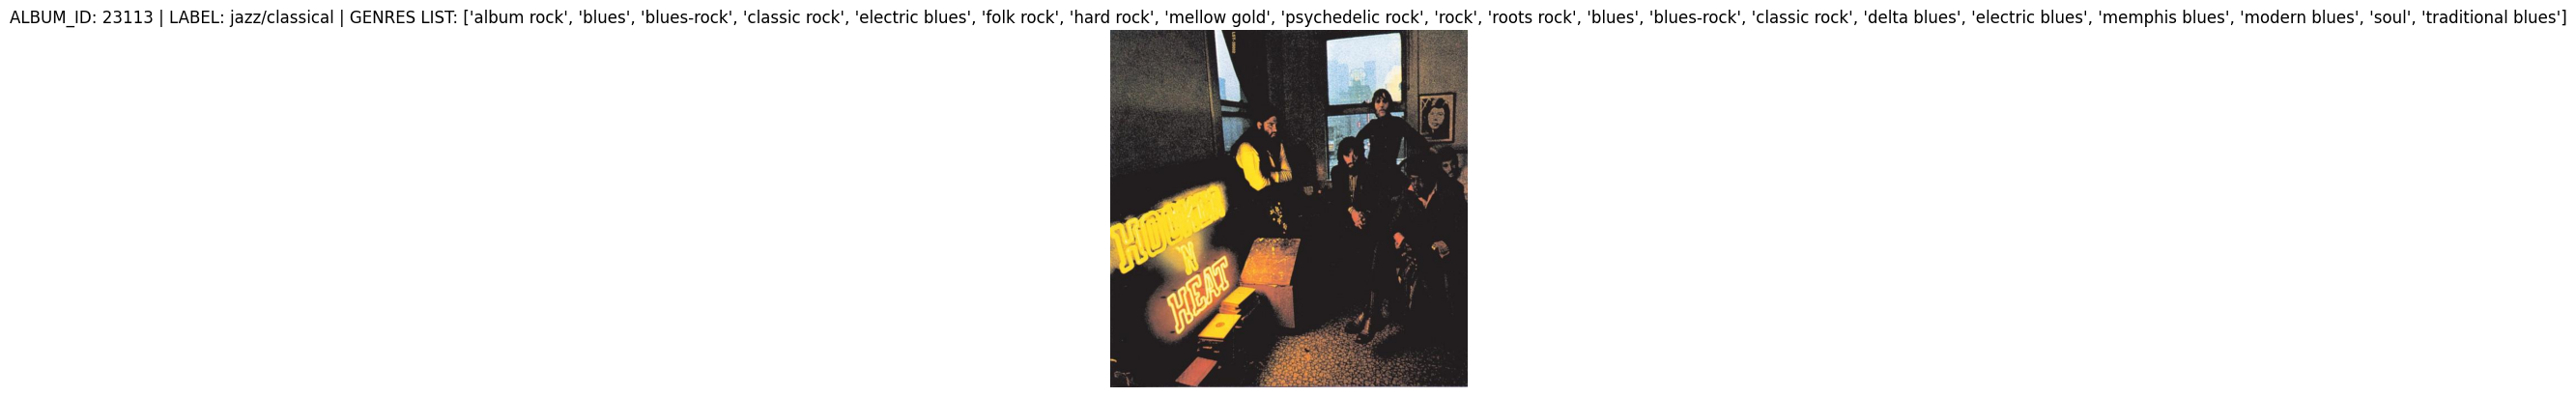

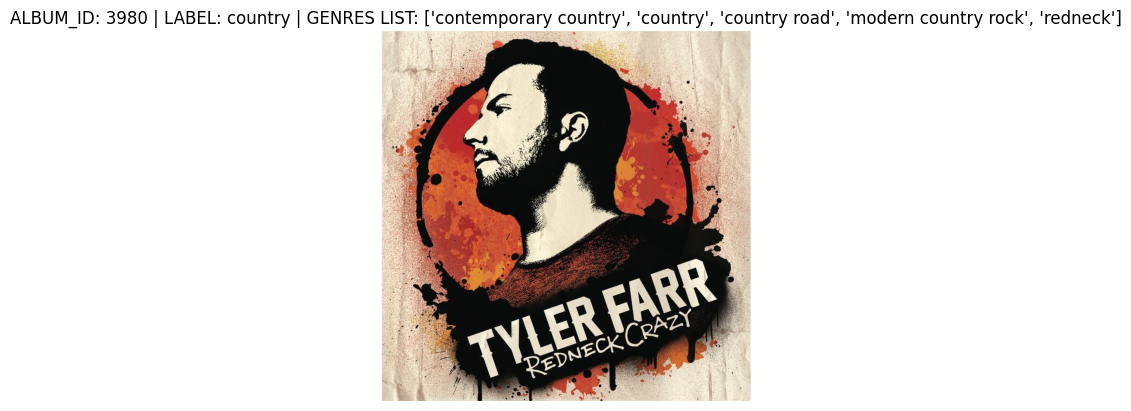

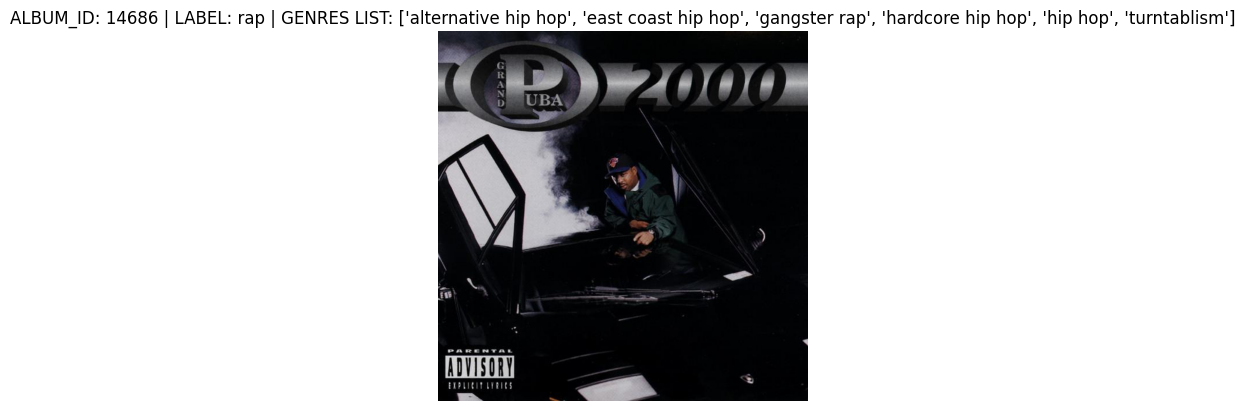

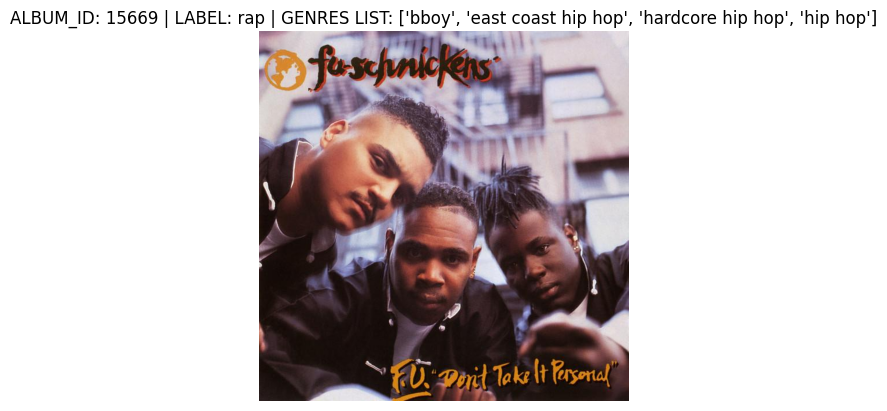

In [71]:
import random
from matplotlib import pyplot as plt
from PIL import Image

# create the inverse map for the genres and their indices
categories_indexed = {v: k for k, v in indexed_categories.items()}

sample_df = balanced_df.sample(15, random_state=43)
for _, row in sample_df.iterrows():
    album = df['album_index'] == row['album_id']
    image = Image.open(f"{images_location}/{row['album_id']}.jpg")
    plt.imshow(image)
    genres_list = extract_genres(df.loc[album,'genres'].iloc[0])
    plt.title(f"ALBUM_ID: {row['album_id']} | LABEL: {categories_indexed[row['genre']]} | GENRES LIST: {genres_list}")
    plt.axis("off")
    plt.show()